# Main analysis of data
## This notebook is intended to be a structured results collection from tools developed locally
### more infoo



---


## Statistics
### Envelope enhancer
#### In this section, FFT is performed and analyzed on regions of interest for each record.
Regions of interest is determined by the envelope of the signal. 

Pipeline:
1. Detrending (Optional)
2. Savgol filter (Optional)
    - Window length: 20
    - Polyorder: 3
    - Axis: 0 (dont change this)
3. Segmentation (Envelope enhancer)
    - n_out: 50-100
    - width: (800, 1600)
    - prominence: (None, None)
    - height: (None, None)
4. FFT

Statistical values considered:
- The mean, variance and std. error of every freqcuency corresponding to a max value in its window.

# Imports and utilities 
### Run this before running the rest of the notebook

In [1]:


from ski_analys import DataRecord, simple_segmentation, envelope_enhancer, savgol_helper, enhanced_fft
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np

def load_data(filter_params, file):
    data = DataRecord(file)
    for filter in filter_params:
        if filter not in data.metadata:
            return None     
        if data.metadata[filter] not in filter_params[filter]:
            return None
    return data

# Generate segmented FFT-data
### Use this cell (or copy it) to generate the FFT data for all records
You need to specify a file containing all raw csv data in the `csv_data_path` variable. The csv files need to be named as aci_j.csv, where i=accel number and j = record number. 

Specify a unique result path `result_path` for each type of analysis. For example *simple_segmentation*, *savgol_filter*...

In [2]:
csv_data_path = pathlib.Path("data/")
result_path = pathlib.Path("fft_env_savgol_detrend_height/")
for file in csv_data_path.glob("*.csv"):
    enhanced_fft(file=file, save_path=result_path.name+"/", enhance_method=envelope_enhancer, filter=savgol_helper, window_length=20, polyorder=3, axis=0, n_out=100, width=(800, 1600), prominence =(None, None), detrending=True, height = (0, 1.6))
print("Done!")

Done!


### Analyze Hannas data
#### Filter based on:
- Records in range 1-9 
- Accelerometer Both

In [3]:
# filter
filter = {
    "record": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], # skip record 0, it was a test run
    "accel": ["1","2"]
}
  # same as the one result_path in the cell above
records = {
    "x": [],
    "y": [],
    "z": []
}

# itterate through results files, filter and load
for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)  # for each file, see if it matches the filter
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

# some basic statistics
np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)


(np.float64(10.220195723617971),
 np.float64(19.800159117121463),
 np.float64(14.674919920925973))

295
295
474
295
475


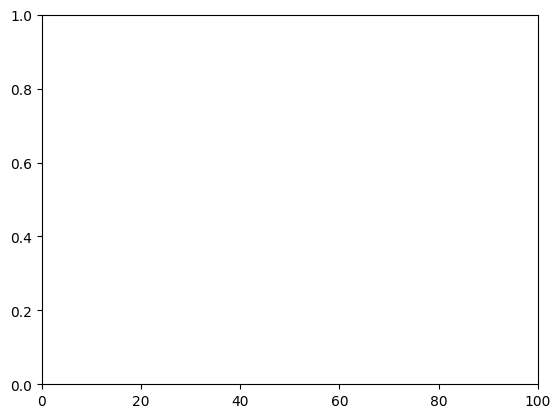

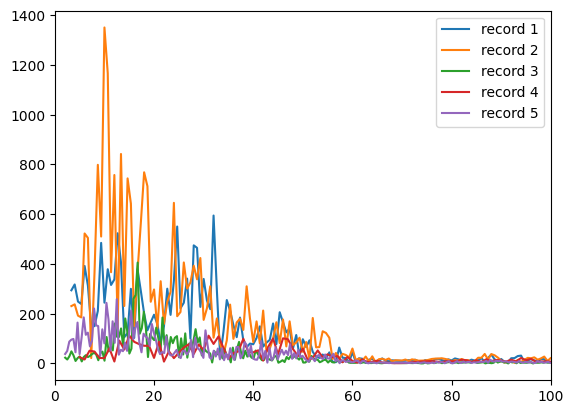

In [4]:
plt.xlim(0,100)
plt.figure()
for x in [1,2,3,4,5]:
    plt.plot(records["z"][x].freqs[5:], records["z"][x].mags[5:], label=f"record {x}")
    print(len(records["z"][x].mags[5:]))
    
plt.legend()
plt.xlim(0,100)
plt.show()


#### Hannas data by accel

In [6]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean x: {np.mean(x_freq_peaks_2)}, mean y: {np.mean(y_freq_peaks_2)}, mean z: {np.mean(z_freq_peaks_2)}\n"
      f"std x: {np.std(x_freq_peaks_2)}, std y: {np.std(y_freq_peaks_2)}, std z: {np.std(z_freq_peaks_2)}\n"
      f"var x: {np.var(x_freq_peaks_2)}, var y: {np.var(y_freq_peaks_2)}, var z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 7.5039635731770735, mean y: 6.886009514454652, mean z: 14.2979979199168
std x: 4.79635572171541, std y: 5.741725589247677, std z: 9.740687116792548
var x: 23.005028209232155, var y: 32.96741274222158, var z: 94.88098550724833

Accel 2:
mean x: 13.594908395377876, mean y: 33.21100678142931, mean z: 15.146072422187444
std x: 2.6191526447487883, std y: 20.932601024775504, std z: 2.55724933832571
var x: 6.859960576494572, var y: 438.17378566243246, var z: 6.539524178367284



### Plotting some of the segments from Hanna's data for accel 1 or 2

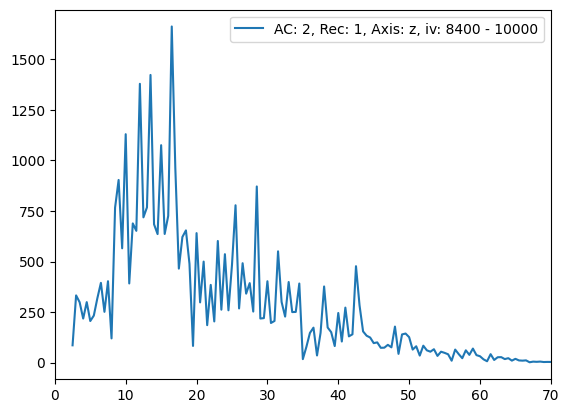

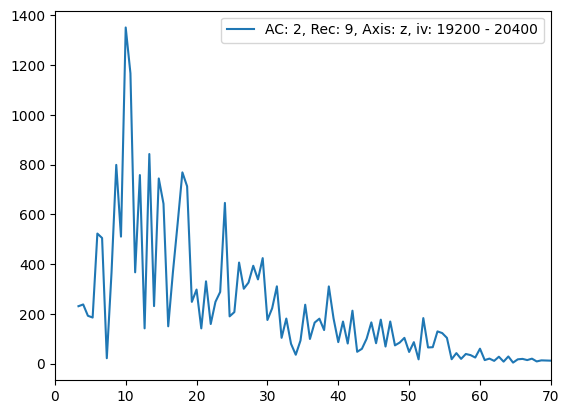

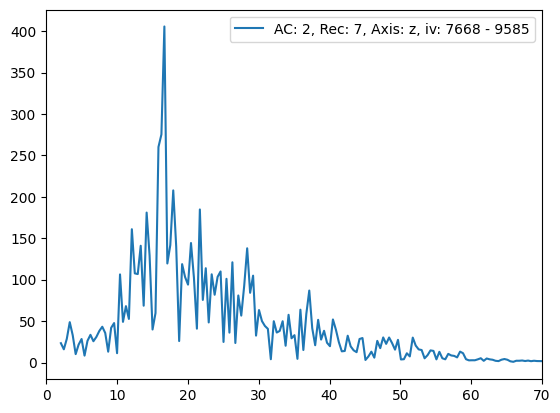

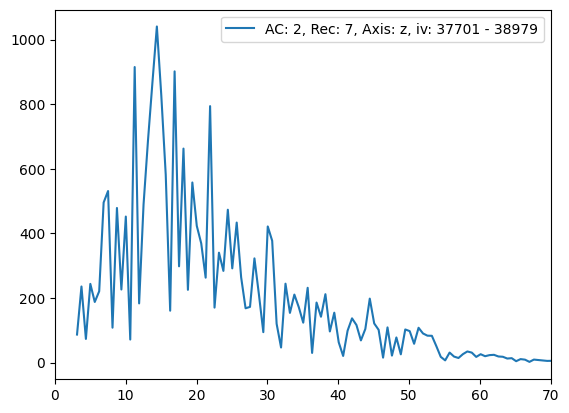

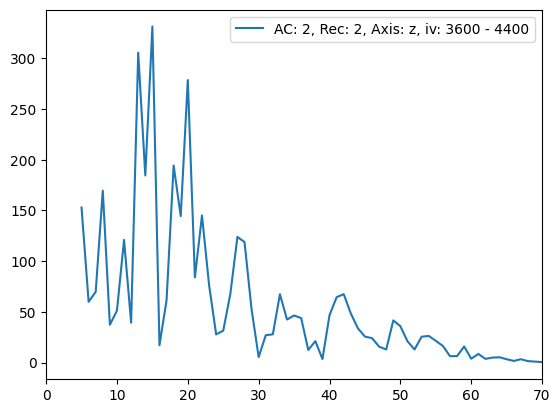

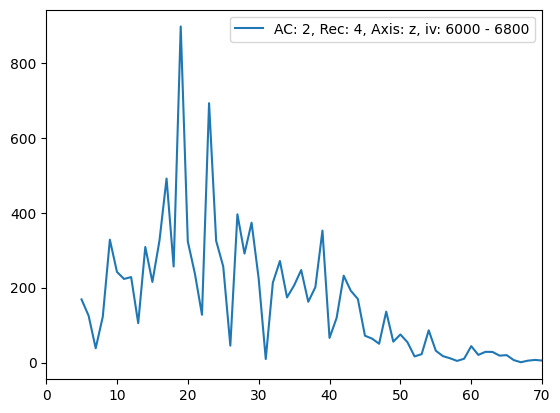

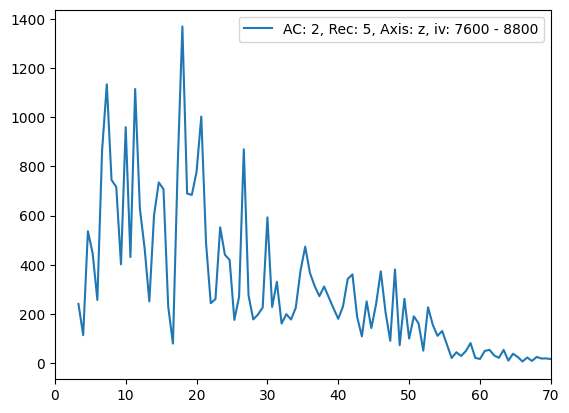

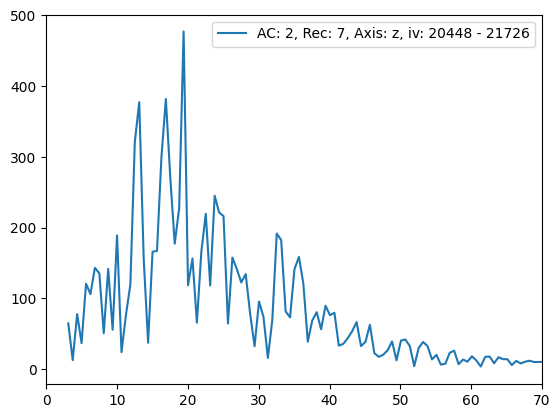

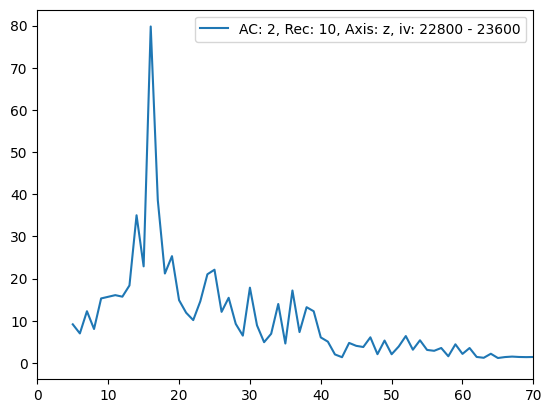

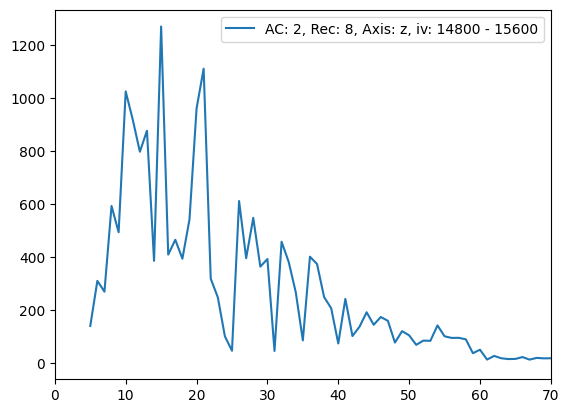

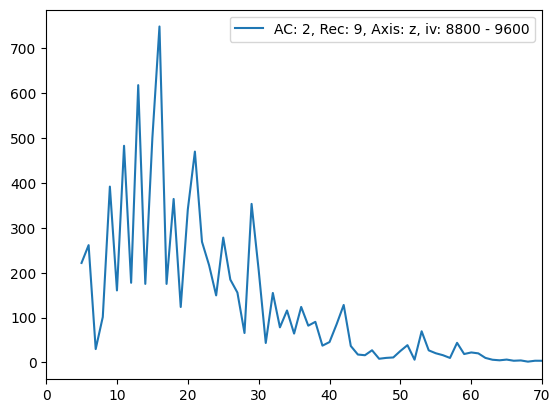

In [8]:
# params
axis = "z"
ac = "2"

for i, rec in enumerate([record for record in records[axis] if record.accel == ac]):
    if i > 10:
        break
    plt.figure()
    plt.xlim(0,70)
    plt.plot(rec.freqs[5:], rec.mags[5:], label=f"AC: {rec.accel}, Rec: {rec.record}, Axis: {rec.coord}, iv: {rec.metadata['start_idx']} - {rec.metadata['end_idx']}")
    plt.legend()
    
        


### Eriks data
filter based on:
- Records in range 11-19
- Accelerometer: Both

In [10]:
# filter
filter = {
    "record": ["11", "12", "13", "14", "15", "16", "17", "18", "19"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

result_path = pathlib.Path("fft_env_savgol_detrend_height/")
records = {
    "x": [],
    "y": [],
    "z": []
}

for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)

(np.float64(10.952043426244234),
 np.float64(10.753871321395874),
 np.float64(12.53859431909587))

In [11]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean: x: {np.mean(x_freq_peaks_2)}, y: {np.mean(y_freq_peaks_2)}, z: {np.mean(z_freq_peaks_2)}\n"
      f"std: x: {np.std(x_freq_peaks_2)}, y: {np.std(y_freq_peaks_2)}, z: {np.std(z_freq_peaks_2)}\n"
      f"var: x: {np.var(x_freq_peaks_2)}, y: {np.var(y_freq_peaks_2)}, z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 7.022766242048912, mean y: 4.544243020010949, mean z: 10.92150246412807
std x: 6.06682899082002, std y: 1.3851196002399997, std z: 7.625337876554301
var x: 36.806414003854265, var y: 1.9185563069690166, var z: 58.145777731613656

Accel 2:
mean: x: 14.350337207169922, y: 16.775329068193372, z: 14.964232101547568
std: x: 3.2681936062873103, y: 18.226660551019556, z: 2.8147533205646247
var: x: 10.681089448177255, y: 332.2111548420925, z: 7.922836255629582

